# 0. Setup (you can skip some of them accoring to you environemnt)

In [160]:
import Pkg

In [ ]:
Pkg.add("Plots")

In [161]:
Pkg.add("Glob")

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 % Resolving package versions...
 Installed Glob ─ v1.2.0
  Updating `~/.julia/environments/v1.0/Project.toml`
  [c27321d9] + Glob v1.2.0
  Updating `~/.julia/environments/v1.0/Manifest.toml`
  [c27321d9] + Glob v1.2.0


In [65]:
Pkg.add("PyCall")

 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
  [438e738f] + PyCall v1.18.4
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]


In [67]:
Pkg.add("LaTeXStrings")

 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
  [b964fa9f] + LaTeXStrings v1.0.3
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]


In [61]:
Pkg.add("PyPlot")

 Resolving package versions...
 Installed LaTeXStrings ─ v1.0.3
 Installed MacroTools ─── v0.4.4
 Installed PyPlot ─────── v2.6.3
 Installed PyCall ─────── v1.18.4
  Updating `~/.julia/environments/v1.0/Project.toml`
  [d330b81b] + PyPlot v2.6.3
  Updating `~/.julia/environments/v1.0/Manifest.toml`
  [b964fa9f] + LaTeXStrings v1.0.3
  [1914dd2f] + MacroTools v0.4.4
  [438e738f] + PyCall v1.18.4
  [d330b81b] + PyPlot v2.6.3
  Building PyCall → `~/.julia/packages/PyCall/rUul9/deps/build.log`


In [ ]:
! brew install imagemagick

# 1. Initialization

In [13]:
using Printf
using Glob
using Plots
using PyPlot
using PyCall

In [5]:
const nx = 256
const dx = 0.01
const dt = 1
const du = 2e-5
const dv = 1e-5

# const cf, const ck = 0.035, 0.065
const cf, ck = 0.012, 0.05

(0.012, 0.05)

In [6]:
# define the initial condition

mx = div(nx,2)
sx = 20
sy = 10
u=ones(nx,nx)
u[(mx-4):(mx+5),(mx-9):(mx+10)]=ones(10,20)*0.5;
u+=reshape(rand(nx*nx)*0.1,nx,nx);
v=zeros(nx,nx)
v[(mx-4):(mx+5),(mx-9):(mx+10)]=ones(10,20)*0.25;
v+=reshape(rand(nx*nx)*0.1,nx,nx);
u0 = u;
v0 = v;

In [7]:
pyplot()

Plots.PyPlotBackend()

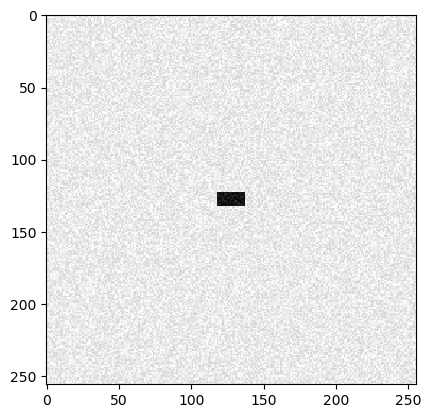

PyObject <matplotlib.image.AxesImage object at 0x145aca828>

In [8]:
imshow(u,cmap="gray")

In [9]:
function laplacian(f,dx)
    dfdx2 = (circshift(f,(1,0))+circshift(f,(-1,0))+circshift(f,(0,1))+circshift(f,(0,-1)) - 4f)/(dx^2)
    return dfdx2
end

laplacian (generic function with 1 method)

# 2. Run simulation
## 2.1. Simple diffusion

In [10]:
tmax=100

t=0
u=u0;
v=v0;

for aa in 1:tmax
    u +=(du * laplacian(u,dx) ) *dt;
    v +=(dv * laplacian(u,dx) ) *dt;
    t=t+dt;
end


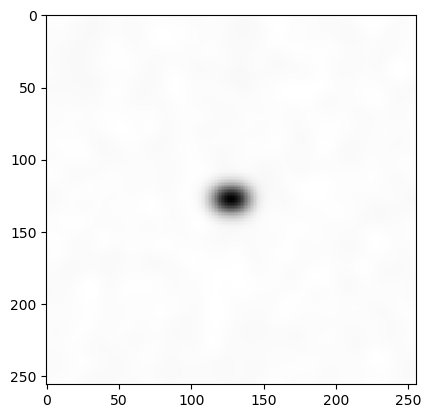

PyObject <matplotlib.image.AxesImage object at 0x12470a240>

In [11]:
imshow(u,cmap="gray")

# 2.2. Reaction Diffusion (Gray Scott model)

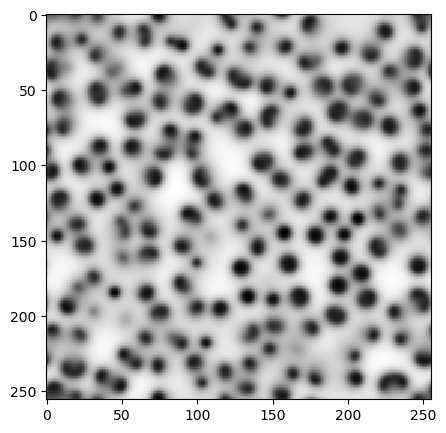

In [14]:

run(`mkdir -p /tmp/hoge`)
fff = glob("*.png","/tmp/hoge");
rm.(fff);

fig = figure("grayscott",figsize=(5,5))
imshow(u,cmap="gray");
PyPlot.savefig(@sprintf("/tmp/hoge/tmp_%06d",0), bbox_inches="tight")


tmax=10000;
tframe=100;

u=u0;
v=v0;
t=0;
for aa in 1:tmax
    u += (du * laplacian(u,dx) -u.*v.*v + cf*(1.0.-u) ) *dt;
    v += (dv * laplacian(v,dx) +u.*v.*v - (cf+ck)*v ) *dt;
    t += dt;
    if(mod(aa,tframe)==0)
        imshow(u,cmap="gray");
        PyPlot.savefig(@sprintf("/tmp/hoge/tmp_%04d",aa), bbox_inches="tight")
    end
end

In [171]:
# create animation gif from the snapshots
run(`convert -delay 9 -loop 0 /tmp/hoge/tmp_\*.png grayscott.gif`)

Process(`convert -delay 9 -loop 0 '/tmp/hoge/tmp_*.png' grayscott.gif`, ProcessExited(0))